# Regularized Linear Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Reduce overfitting -> regularize the model
Set constraints to the model so the model use less features/weaker features.

## Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\sum_{1=1}^n \theta_{i}^{2}$ is added to the cost function. This forces the learning algorithm to not only fit the data but aslo keep the model weights as small as possible.

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

Ridge Regression cost function:

$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta^{2}_{i}$

Note that the bias term $\theta_{0}$ is not regularized. If we define w as the vector of feature weights (θ1 to θn), then the regularization term is simply equal to ½(∥ w ∥2)2, where ∥ · ∥2 represents the ℓ2 norm of the weight vector.

It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Increasing $\alpha$ leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces the model’s variance but increases its bias.

Ridge Regression closed-form solution:

$\hat{\theta} = (X^T.X + \alpha A)^-1 . X^T . y$

We can use matrix factorization technique by Andre-Louis Cholesky)

In [3]:
from sklearn.linear_model import Ridge

In [4]:
ridge_reg = Ridge(alpha=0, solver='cholesky').fit(X, y)

In [5]:
ridge_reg.predict([[1.5]])

array([[5.10855808]])

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2').fit(X, y.ravel())

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [7]:
sgd_reg.predict([[1.5]])

array([4.03638107])

The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge
Regression.

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2 norm

Lasso Regression cost function:

$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n}  \left|\theta_{i}\right|$

An important characteristic of Lasso Regression is that it tends to completely eliminatethe weights of the least important features (i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

In [8]:
from sklearn.linear_model import Lasso

In [9]:
lasso_reg = Lasso(alpha=0.1).fit(X, y)

In [10]:
lasso_reg.predict([[1.5]])

array([5.06034714])

## Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

Elastic Net cost function

$J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^{n} |\theta| + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_{i}^{2}$

So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It is almost
always preferable to have at least a little bit of regularization, so generally you should
avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a
few features are actually useful, you should prefer Lasso or Elastic Net since they tend
to reduce the useless features’ weights down to zero as we have discussed. In general,
Elastic Net is preferred over Lasso since Lasso may behave erratically when the number
of features is greater than the number of training instances or when several features
are strongly correlated.

In [11]:
from sklearn.linear_model import ElasticNet

In [12]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)

In [13]:
elastic_net.predict([[1.5]])

array([5.06362226])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set. However,after a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch."

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

In [15]:
X_poly_scaled = pipe.fit_transform(X)

In [16]:
from sklearn.base import clone

In [17]:
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, 
                      learning_rate='constant', eta0=0.0005)

In [18]:
# minimum_val_error = float('inf')
# best_epoch = None
# best_model = None
# for epoch in range(1000):
#     sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
#     y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#     val_error = mean_squared_error(y_val_predict, y_val)
#     if val_error < minimum_val_error:
#         minimum_val_error = val_error
#         best_epoch = epoch
#         best_model = clone(sgd_reg)

---

# Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). __This makes it a binary classifier.__

## Estimating Probabilities

So how does it work? Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result

Logistic Regression model estimated probability (vectorized form)

$\hat{p} = h_{\theta}(x) = \sigma(\theta^T . x)$

$\sigma()$ represents sigmoid function, that outputs a number between 0 and 1.

Sigmoid function:

$\sigma(t) = \frac{1}{1 + e^{-t}}$

Instance x belongs to the positive class, it can make its prediction ŷ easily

$ \hat{y} = \left\{
\begin{array}{ll}
    0 & \hat{p} < 0.5,\\
    1 & \hat{p} \geq 0.5. \\
\end{array}
\right.$

---

## Training and Cost Function

Good, now you know how a Logistic Regression model estimates probabilities and
makes predictions. But how is it trained? The objective of training is to set the parameter
vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0)

Cost function of a single training instance:

$ c(\theta) = \left\{
\begin{array}{ll}
    -log(\hat{p}) & y = 1, \\
    -log(1 - \hat{p}) & y = 0. \\
\end{array}
\right.
$

This cost function makes sense because – log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

Logistic Regression cost function (log loss)

$J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]$

Bad news: there is no equivalent normal function to computes the value of $\theta$ that minimizes the cost function. But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). 

Logistic cost function partial derivatives:

$\frac{\partial}{\partial\theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m (\sigma(\theta^{T} x^{(i)}) - y^{(i)})x^{(i)}_{j}$

This equation looks very much like Equation 4-5: for each instance it computes the
prediction error and multiplies it by the jth feature value, and then it computes the
average over all training instances. Once you have the gradient vector containing all
the partial derivatives you can use it in the Batch Gradient Descent algorithm. That’s
it: you now know how to train a Logistic Regression model. For Stochastic GD you
would of course just take one instance at a time, and for Mini-batch GD you would
use a mini-batch at a time.

## Decision Boundaries

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()

In [21]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [22]:
X = iris['data'][:, 3:] # petal widht
y = (iris['target'] == 2).astype(np.int) # 1 if iris-virginica, else 0

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X, y)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

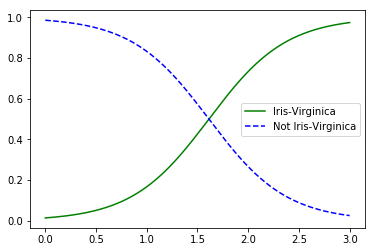

In [32]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend();

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris- Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris- Virginica, or else it will predict that it is not (even if it is not very confident):

In [33]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

The regularization parameter for logistic regression is C, the higher the value of C, the less the model is regularized.

## Softmax Regression

This is the multinomial logistic regression.

The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute sk(x) should look familiar, as it is just like the equation for Linear Regression prediction

Softmax score for class k:

$s_k(x) = \theta_{k}^{T} . x$

Note that each class has its own dedicated parameter vector $\theta_k$. All these vectors are typically stored as rows in a parameter matrix $\Theta$

Once you have computed the score of every class for the instance x, you can estimate the probability pk that the instance belongs to class k by running the scores through the softmax function: it computes the exponential of every socre then normalizes them (dividing by the summ of all the exponentials).

Softmax function:

$\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^{K} exp(s_j(x))}$

- K is the number of classes
- s(x) is a vector containing the scores of each class for the instance x
- $\theta(s(x))_k$ is the estimated probabilty that the instance x belongs to class k given the scores of each class for that instance

The softmax classifier predicts the clas with the highest estimated probability.

Softmax Regression classifier prediction:

$\hat{y} = argmax_k \sigma(s(x))_k = argmax s_k(x) = argmax(\theta_k^T . x)$

The argmax operator returns the value of a variable that minimizes a function In this equation, it returns the value of k that maximizes the estimated probability σ(s(x))k.

 The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions, let’s take a look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function called the cross entropy, should lead to this objective because it penalizes the model when it estimatesa low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes (we will use it again several times in the following chapters).

Cross entropy cost function:

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} log (\hat{p}_k^{(i)})$

$y_k^{(i)}$ is equal to 1 if the target class for the ith instance is k; otherwise, it is equal to0.

Cross entropy gradient vector for class k:

$\nabla_{\theta_{k}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_{k}^{(i)} - y_k^{(i)}) x^{(i)}$

Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver. It also applies ℓ2 regularization by default, which you can
control using the hyperparameter C.

In [34]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

In [36]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
softmax_reg.predict([[5, 2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])